## Importando biblioteca e dependencias do notebook

In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import date
import gzip
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

### Carregamento dos Dados
> O carregamento é feito via requisição GET no site brasil.io

In [2]:
data_full = requests.get('https://data.brasil.io/dataset/covid19/caso_full.csv.gz')

#arquivo em modo de escrita de binário(wb) é gravado no conteúdo da variavél data_full
open('caso_full.csv.gz', 'wb').write(data_full.content)

28170735

* Descompactação do arquivo (gzip)
* Leitura do csv (pandas)

In [3]:
with gzip.open('caso_full.csv.gz') as f:
    df = pd.read_csv(f)

Analisamos as informações gerais do dataset, como o nome da coluna, o tipo, e se há dados nulos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925921 entries, 0 to 925920
Data columns (total 18 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   city                                           919869 non-null  object 
 1   city_ibge_code                                 922174 non-null  float64
 2   date                                           925921 non-null  object 
 3   epidemiological_week                           925921 non-null  int64  
 4   estimated_population                           922174 non-null  float64
 5   estimated_population_2019                      922174 non-null  float64
 6   is_last                                        925921 non-null  bool   
 7   is_repeated                                    925921 non-null  bool   
 8   last_available_confirmed                       925921 non-null  int64  
 9   last_available_confirmed_per_100k_inh

In [5]:
#visualização do cabeçalho do csv
df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0,0,3,city,SP,0,0


In [6]:
# 10/4/20 	  sexta-feira 	    Paixão de Cristo
# 21/4/20 	  terça-feira 	    Tiradentes
# 1/5/20 	    sexta-feira 	    Dia do Trabalho
# 11/6/20 	  quinta-feira 	    Corpus Christi
# 7/9/20 	    segunda-feira     Independência do Brasil
# 12/10/20 	  segunda-feira 	  Nossa Sr.a Aparecida - Padroeira do Brasil -> Até aqui, por enquanto.
# 2/11/20 	  segunda-feira 	  Finados
# 15/11/20 	  domingo 	        Proclamação da República
# 25/12/20 	  sexta-feira 	    Natal        



#media movel
feriados_br = [
               '2020-04-10',
               '2020-04-21',
               '2020-05-01',
               '2020-05-22',
               '2020-05-23',
               '2020-05-24',
               '2020-05-25',
               '2020-05-26',
               '2020-05-27',
               '2020-06-11',
               '2020-09-07',
               '2020-10-12',
               ]

df = df[~df['date'].isin(feriados_br).sort_values(ascending=False)]

df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0000,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0000,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0000,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0000,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0000,0,3,city,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925916,NaN,43.0,2020-10-22,43,11422973.0,11377239.0,True,False,228762,2002.64852,2020-10-22,0.0241,5518,227,state,RS,1299,36
925917,NaN,42.0,2020-10-22,43,7252502.0,7164788.0,True,False,241044,3323.59784,2020-10-22,0.0125,3011,225,state,SC,2211,13
925918,NaN,28.0,2020-10-22,43,2318822.0,2298696.0,True,False,83139,3585.39810,2020-10-22,0.0259,2157,223,state,SE,313,6
925919,NaN,35.0,2020-10-22,43,46289333.0,45919049.0,True,False,1076939,2326.53817,2020-10-22,0.0357,38482,241,state,SP,3678,111


### Filtragem das colunas de interesse para a analise inicial
* Ja notamos uma inconsistencia nos dados, na coluna City, podemos observar que há nomes de cidades ausentes, preenchidos por **NaN**

In [7]:
#selecionando apenas as colunas que serão utilizadas para analise inicial dos dados
df = df[['state', 'city', 'date', 'order_for_place','is_last','epidemiological_week','estimated_population_2019','last_available_confirmed','last_available_death_rate','last_available_deaths', 'new_confirmed', 'new_deaths']]
df.head()

,state,city,date,order_for_place,is_last,epidemiological_week,estimated_population_2019,last_available_confirmed,last_available_death_rate,last_available_deaths,new_confirmed,new_deaths
0,SP,São Paulo,2020-02-25,1,False,9,12252023.0,1,0.0,0,1,0
1,SP,NaN,2020-02-25,1,False,9,45919049.0,1,0.0,0,1,0
2,SP,São Paulo,2020-02-26,2,False,9,12252023.0,1,0.0,0,0,0
3,SP,NaN,2020-02-26,2,False,9,45919049.0,1,0.0,0,0,0
4,SP,São Paulo,2020-02-27,3,False,9,12252023.0,1,0.0,0,0,0


### Nessa analise, podemos observar os maiores registros de novos casos e novas mortes. 

* Dia com maior quantidade de casos e mortes: 22 de Julho de 2020

In [8]:
df.agrupado = df.groupby(['epidemiological_week', 'date'])['new_confirmed', 'new_deaths'].sum().reset_index()

df.agrupado.sort_values(by='new_confirmed', ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,epidemiological_week,date,new_confirmed,new_deaths
138,30,2020-07-22,132021,2591
160,33,2020-08-13,115868,2412
146,31,2020-07-30,115448,2385
139,30,2020-07-23,114920,2627
105,25,2020-06-19,111971,2336
...,...,...,...,...
5,10,2020-03-01,0,0
4,9,2020-02-29,0,0
13,11,2020-03-09,0,0
2,9,2020-02-27,0,0


### Criação da coluna Regioes, onde separo cada estado por sua região, para uma possibilidade de analise macro por regiões

In [9]:
norte = ["AC", "AM", "AP", "PA", "RO", "RR", "TO"]
nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
sudeste = ['ES', 'MG', 'RJ', 'SP']
sul = ['PR', 'RS', 'SC']
centro_oeste = ['DF', 'GO', 'MT', 'MS']

regiao = [nordeste, norte, sudeste, sul, centro_oeste]
label_reg = ['Nordeste', 'Norte', 'Sudeste', 'Sul', 'Centro Oeste']

#aplica a coluna region para cada estado
for r in range(len(regiao)) :
    for a in range(len(regiao[r])) :
        df.loc[df['state'].eq(regiao[r][a]), 'region'] = label_reg[r]


df

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,state,city,date,order_for_place,is_last,epidemiological_week,estimated_population_2019,last_available_confirmed,last_available_death_rate,last_available_deaths,new_confirmed,new_deaths,region
0,SP,São Paulo,2020-02-25,1,False,9,12252023.0,1,0.0000,0,1,0,Sudeste
1,SP,NaN,2020-02-25,1,False,9,45919049.0,1,0.0000,0,1,0,Sudeste
2,SP,São Paulo,2020-02-26,2,False,9,12252023.0,1,0.0000,0,0,0,Sudeste
3,SP,NaN,2020-02-26,2,False,9,45919049.0,1,0.0000,0,0,0,Sudeste
4,SP,São Paulo,2020-02-27,3,False,9,12252023.0,1,0.0000,0,0,0,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...
925916,RS,NaN,2020-10-22,227,True,43,11377239.0,228762,0.0241,5518,1299,36,Sul
925917,SC,NaN,2020-10-22,225,True,43,7164788.0,241044,0.0125,3011,2211,13,Sul
925918,SE,NaN,2020-10-22,223,True,43,2298696.0,83139,0.0259,2157,313,6,Nordeste
925919,SP,NaN,2020-10-22,241,True,43,45919049.0,1076939,0.0357,38482,3678,111,Sudeste


Contagem das aparições de cada região no dataset.

* No gráfico de barras, é possível visualizar as maiores aparições na região nordeste

In [10]:
df['region'].value_counts()

Nordeste        291690
Sudeste         261730
Sul             180827
Norte            76693
Centro Oeste     70557
Name: region, dtype: int64

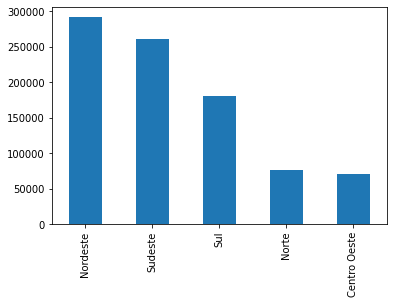

In [11]:
df['region'].value_counts().plot(kind='bar')

Analisando a região Nordeste para ver, quais de seus estados tiveram mais numero de mortes.

* No Nordeste, o estado do **CE** foi o que mais registrou mortes.

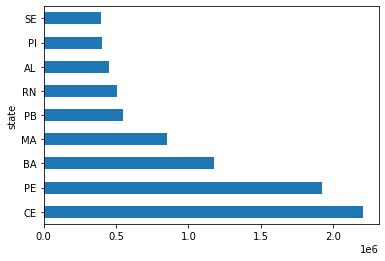

In [12]:
nordeste = df[df['region'] == 'Nordeste']

nordeste.groupby('state')['last_available_deaths'].sum().sort_values(ascending=False).plot(kind='barh')

Na região Sudeste, o estado de **SP** foi o que registrou mais mortes.

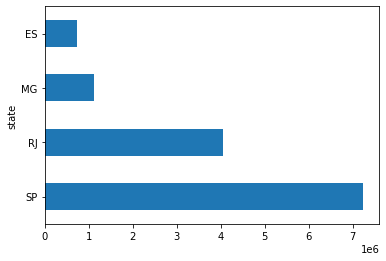

In [13]:
sudeste = df[df['region'] == 'Sudeste']

sudeste.groupby('state')['last_available_deaths'].sum().sort_values(ascending=False).plot(kind='barh')

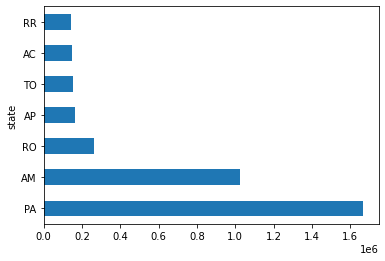

In [14]:
norte = df[df['region'] == 'Norte']

norte.groupby('state')['last_available_deaths'].sum().sort_values(ascending=False).plot(kind='barh')

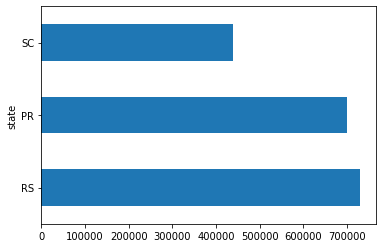

In [15]:
sul = df[df['region'] == 'Sul']

sul.groupby('state')['last_available_deaths'].sum().sort_values(ascending=False).plot(kind='barh')

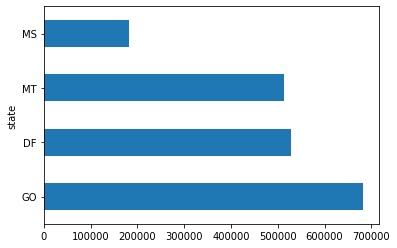

In [16]:
centro_oeste = df[df['region'] == 'Centro Oeste']

centro_oeste.groupby('state')['last_available_deaths'].sum().sort_values(ascending=False).plot(kind='barh')

In [17]:
temp = df.groupby(['epidemiological_week', 'date'])['new_confirmed','new_deaths'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [18]:
temp = temp.melt(id_vars='date', value_vars=['new_confirmed', 'new_deaths'], 
                 var_name='Case', value_name='Count')

temp

,date,Case,Count
0,2020-02-25,new_confirmed,2
1,2020-02-26,new_confirmed,0
2,2020-02-27,new_confirmed,0
3,2020-02-28,new_confirmed,2
4,2020-02-29,new_confirmed,0
...,...,...,...
453,2020-10-18,new_deaths,511
454,2020-10-19,new_deaths,569
455,2020-10-20,new_deaths,1127
456,2020-10-21,new_deaths,863


In [19]:
temp2 = df.groupby(['epidemiological_week'])['new_confirmed','new_deaths'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [20]:
df.rename(columns={'last_available_confirmed' : 'confirmed', 'last_available_confirmed_per_100k_inhabitants' : 'incidence',
                    'estimated_population_2019' : 'population','last_available_deaths' : 'deaths',
                    'last_available_death_rate' : 'death_rate', 'order_for_place' : 'day'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


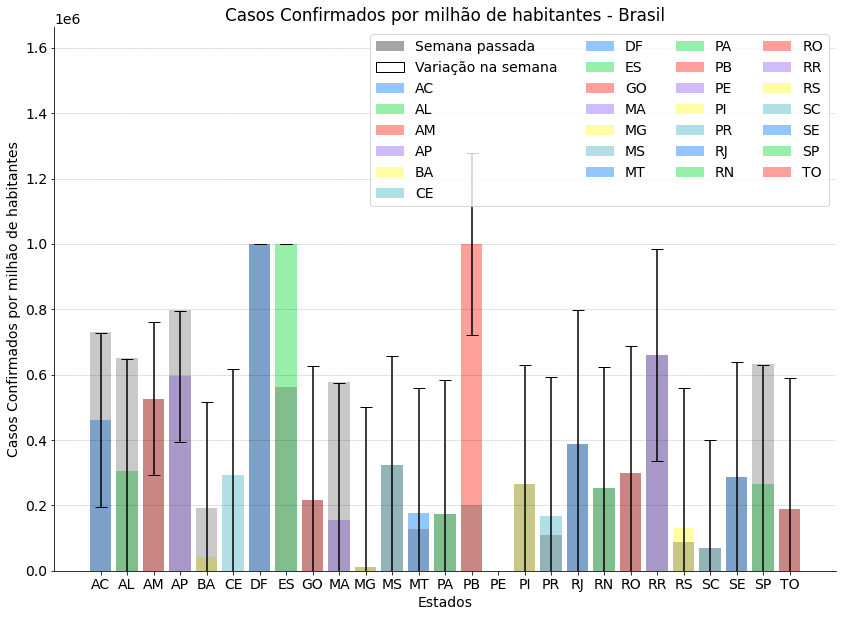

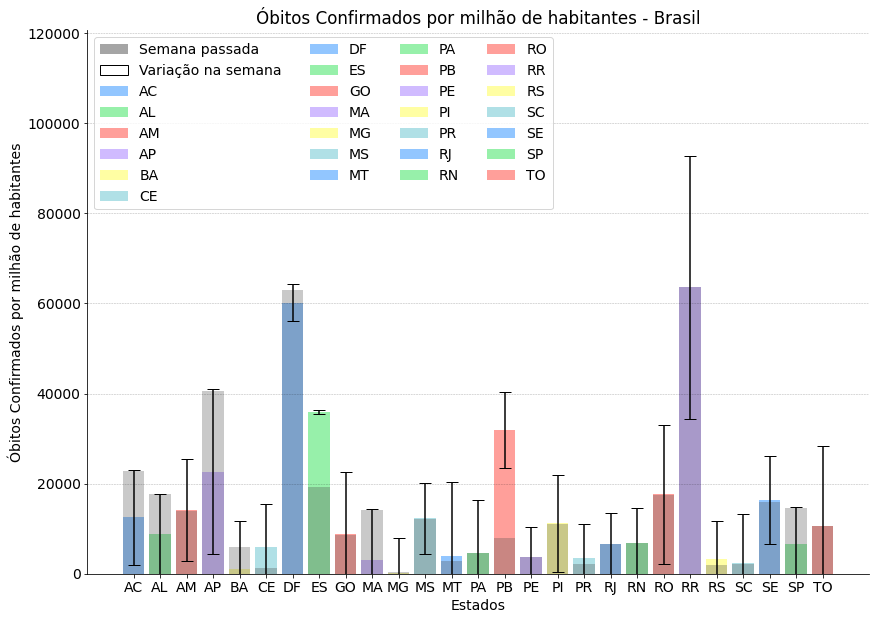

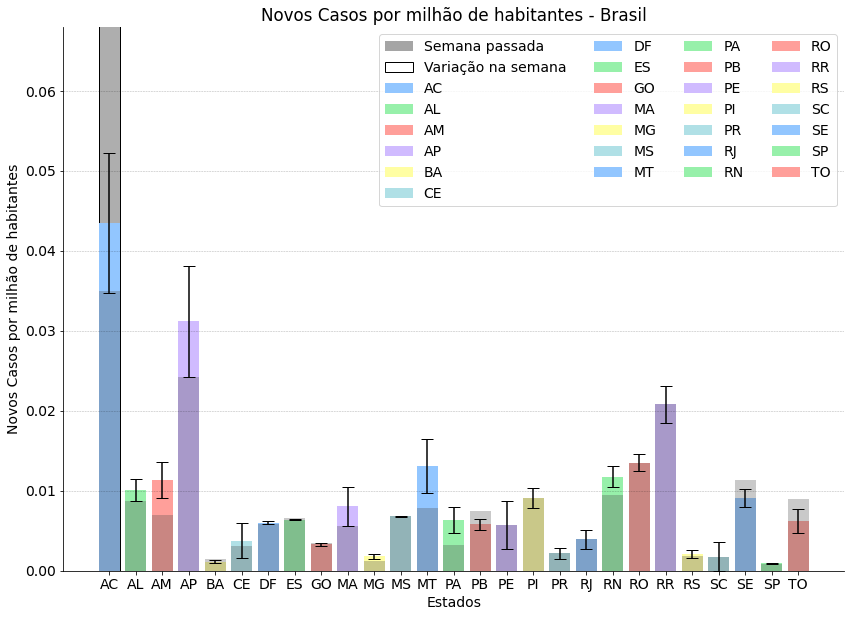

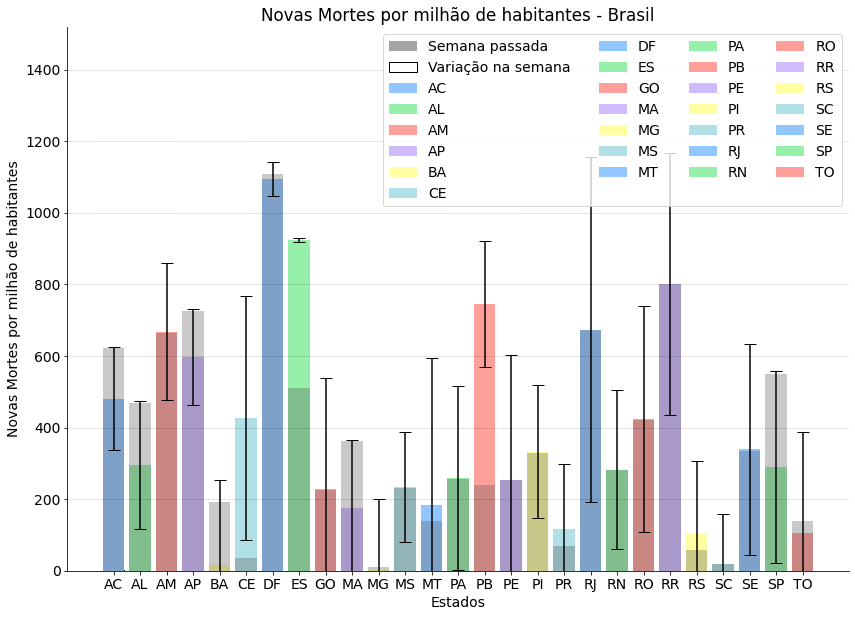

In [21]:
plt.style.use('seaborn-pastel')

label = ["Estado", "Regiao", "População", "Último Dado", "Data", "Dia", "Casos Confirmados",
         "Óbitos Confirmados", "Novos Casos", "Novas Mortes", "Incidência de Casos", "Mortalidade"]

for f in range(6, 10) :  
    plt.rc('font', size=14)
    plt.rcParams['figure.figsize'] = [14, 10]

    plt.gca().spines["top"].set_visible(False)    
    plt.gca().spines["right"].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()    
    plt.gca().get_yaxis().tick_left()
    plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)

    estados = list(df.loc[df['is_last'],
                                  ['state']
                                 ].sort_values('state', ascending = True)['state'].unique())

    y_max = 0
    y_pmax = [5000, 1000, 1000, 200]
        
    plt.bar(estados[0], 1, label = 'Semana passada', color = (.3, .3, .3, .5))
    plt.bar(estados[0], 1, label = 'Variação na semana', color = (1, 1, 1, 0.1), edgecolor = 'black')
    
    for e in range(27) :      
        pop = max(df.loc[(df['state'] == estados[e]) & (df['is_last']), 
                                 ['population']].loc[:, 'population'])
        
        y = np.median(df.loc[(df['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-1, f].tail(7))
        
        y_pop = (10 ** 6) * y / pop
        y_pop_std = (10 ** 6) * np.std(df.loc[(df['state'] == estados[e]),
                                                   :].sort_values('day', ascending = True).iloc[:-1, f].tail(7)) / pop        
        
        y_last = np.median(df.loc[(df['state'] == estados[e]), 
                                   :].sort_values('day', ascending = True).iloc[:-8, f].tail(14))
        
        y_pop_last = (10 ** 6) * y_last / pop
        y_pop_last_std = (10 ** 6) * np.std(df.loc[(df['state'] == estados[e]), 
                                                    :].sort_values('day', ascending = True).iloc[:-8, f].tail(14)) / pop
        
        if (y_pop + y_pop_std) > y_max : y_max = (y_pop + y_pop_std)
        #print(y_pop_std)
        
        ratio = y_pop / y_max
        
        if ratio < .0625 :
            plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e],  align='center', capsize = 6)
        elif (ratio >= .0625) & (ratio <= .125) :   
            plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e],  align='center', capsize = 6)
        elif (ratio >= .125) & (ratio <= .25) :
            plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e],  align='center', capsize = 6)
        elif (ratio >= .25) & (ratio <= .5) :
            plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e],  align='center', capsize = 6)
        elif (ratio >= .5) & (ratio <= .75) :
             plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e], align='center', capsize = 6)
        else  :
            plt.bar(estados[e], y_pop, yerr = y_pop_std, label = estados[e], align='center', capsize = 6)
        
        plt.bar(estados[e], y_pop_last, color = (.3, .3, .3, .3))
        
    plt.xlabel('Estados')       
    plt.ylim(0, y_max * 1.3)         
    plt.title(label[f] + " por milhão de habitantes - Brasil")
    plt.legend(ncol = 4)
    plt.ylabel(label[f] + " por milhão de habitantes")
    plt.savefig('graficos/' + label[f] + " 1M.png")
    plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


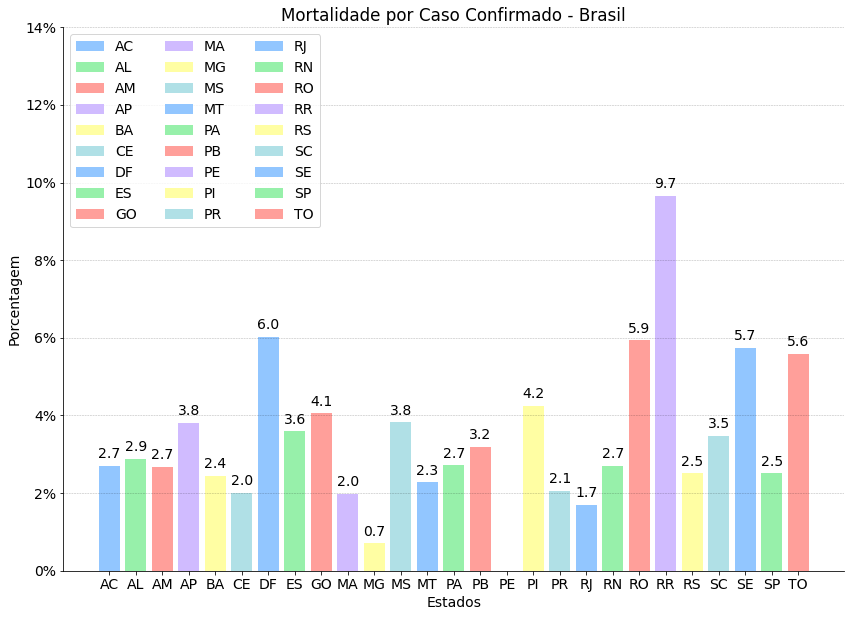

In [22]:
plt.rc('font', size = 14)
plt.rcParams['figure.figsize'] = [14, 10]

plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)
plt.gca().get_xaxis().tick_bottom()    
plt.gca().get_yaxis().tick_left()
plt.grid(True, axis = 'y', linestyle = "dashed", lw = 0.5, color = "black", alpha = 0.3)


estados = list(df.loc[df['is_last'],
                              ['state']
                             ].sort_values('state', ascending = True)['state'].unique())

y_max = 1

for e in range(27) :      
    y = np.median(df.loc[(df['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-1, 7].tail(7))
    
    yc = np.median(df.loc[(df['state'] == estados[e]), 
                               :].sort_values('day', ascending = True).iloc[:-1, 6].tail(7))

    ymor = y / yc

    ratio = ymor / 0.15

    if ratio < .0625 :
        plt.bar(estados[e], ymor, label = estados[e])
    elif (ratio >= .0625) & (ratio <= .125) :   
        plt.bar(estados[e], ymor, label = estados[e])
    elif (ratio >= .125) & (ratio <= .25) :
        plt.bar(estados[e], ymor, label = estados[e])
    elif (ratio >= .25) & (ratio <= .5) :
        plt.bar(estados[e], ymor, label = estados[e])
    elif (ratio >= .5) & (ratio <= .75) :
         plt.bar(estados[e], ymor, label = estados[e])
    else  :
        plt.bar(estados[e], ymor, label = estados[e])
    
    if ymor != 0 :   
        plt.text(estados[e], ymor + .003, str(round(ymor * 100, 1)), color = 'black', 
                 fontsize = 14, horizontalalignment = 'center', verticalalignment = 'center')
    
plt.yticks(np.arange(0, .15, .02), 
           [str(x) + "%" for x in np.arange(0, 15, 2)], fontsize = 14)        
        
plt.xlabel('Estados')       
plt.ylim(0, 0.14)         
plt.title("Mortalidade por Caso Confirmado - Brasil")
plt.legend(ncol = 3)
plt.ylabel("Porcentagem")
plt.savefig("graficos/ Mortalidade.png")
plt.show()

### Renomeia as colunas para idioma pt-br

In [23]:
df_estados = df.groupby(['city', 'date', 'state'])['new_confirmed','new_deaths'].sum().reset_index()
df_estados

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,city,date,state,new_confirmed,new_deaths
0,Abadia de Goiás,2020-05-21,GO,6,0
1,Abadia de Goiás,2020-05-28,GO,0,0
2,Abadia de Goiás,2020-05-29,GO,0,0
3,Abadia de Goiás,2020-05-30,GO,0,0
4,Abadia de Goiás,2020-05-31,GO,0,0
...,...,...,...,...,...
875764,Óleo,2020-10-18,SP,0,0
875765,Óleo,2020-10-19,SP,0,0
875766,Óleo,2020-10-20,SP,0,0
875767,Óleo,2020-10-21,SP,0,0


In [24]:
df_estados.city.value_counts(10)

Importados/Indefinidos    0.004047
Bom Jesus                 0.000918
Santa Luzia               0.000807
São Domingos              0.000806
Bonito                    0.000734
                            ...   
Garruchos                 0.000035
Novo Tiradentes           0.000034
Pedras Altas              0.000033
Estrela Velha             0.000031
Coqueiro Baixo            0.000022
Name: city, Length: 5294, dtype: float64

In [25]:
#Agrupando por data,semana epidemiologica por ultimos confirmados e mortos
df_agrupado = df.groupby(['epidemiological_week', 'date'])['new_confirmed', 'new_deaths'].sum().reset_index()
df_agrupado.sort_values(by='new_confirmed', ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,epidemiological_week,date,new_confirmed,new_deaths
138,30,2020-07-22,132021,2591
160,33,2020-08-13,115868,2412
146,31,2020-07-30,115448,2385
139,30,2020-07-23,114920,2627
105,25,2020-06-19,111971,2336
...,...,...,...,...
5,10,2020-03-01,0,0
4,9,2020-02-29,0,0
13,11,2020-03-09,0,0
2,9,2020-02-27,0,0


In [26]:
temp = df.groupby(['epidemiological_week', 'date'])['new_confirmed','new_deaths'].sum().reset_index()
temp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,epidemiological_week,date,new_confirmed,new_deaths
0,9,2020-02-25,2,0
1,9,2020-02-26,0,0
2,9,2020-02-27,0,0
3,9,2020-02-28,2,0
4,9,2020-02-29,0,0
...,...,...,...,...
224,43,2020-10-18,24644,511
225,43,2020-10-19,28936,569
226,43,2020-10-20,40641,1127
227,43,2020-10-21,42764,863


In [27]:
#função melt do pandas para remodelar o dataframe com variável e valor, para ter a quantidade de casos
temp = temp.melt(id_vars='date', value_vars=['new_confirmed', 'new_deaths'], 
                 var_name='Case', value_name='Count')
temp

,date,Case,Count
0,2020-02-25,new_confirmed,2
1,2020-02-26,new_confirmed,0
2,2020-02-27,new_confirmed,0
3,2020-02-28,new_confirmed,2
4,2020-02-29,new_confirmed,0
...,...,...,...
453,2020-10-18,new_deaths,511
454,2020-10-19,new_deaths,569
455,2020-10-20,new_deaths,1127
456,2020-10-21,new_deaths,863


### Plots das 3 semanas epidemiológicas com maiores registros de mortes

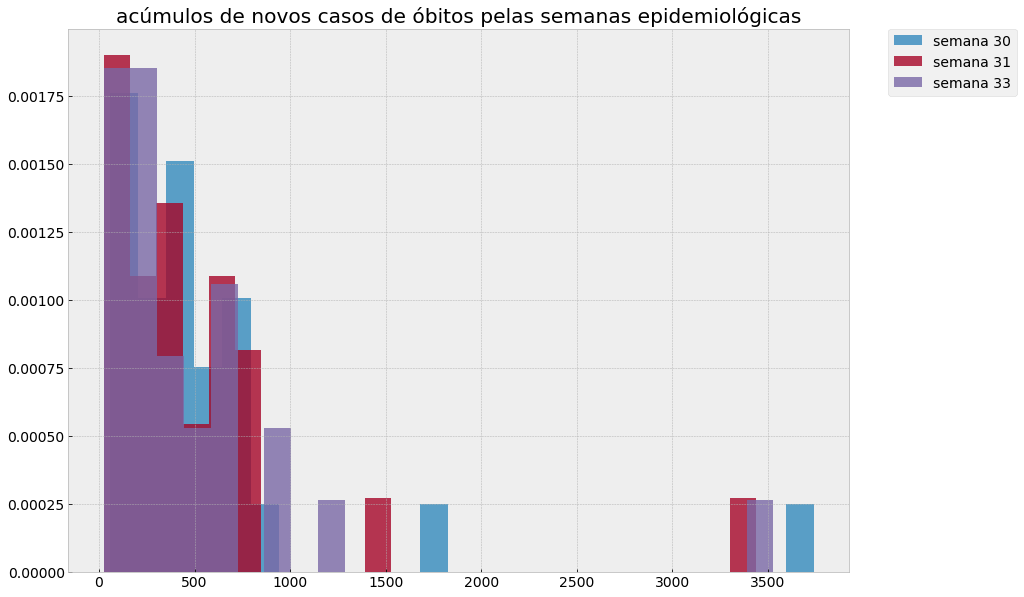

In [28]:
plt.style.use('bmh')
plt.subplots()
df[df['epidemiological_week'] == 30].groupby('state')['new_deaths'].sum().hist(histtype="stepfilled",bins=25, alpha=0.8, density=True, label='semana 30')
df[df['epidemiological_week'] == 31].groupby('state')['new_deaths'].sum().hist(histtype="stepfilled",bins=25, alpha=0.8, density=True, label='semana 31')
df[df['epidemiological_week'] == 33].groupby('state')['new_deaths'].sum().hist(histtype="stepfilled",bins=25, alpha=0.8, density=True, label='semana 33')
plt.title('acúmulos de novos casos de óbitos pelas semanas epidemiológicas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [29]:
# df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y').dt.strftime('%d-%m-%Y')

# df

In [30]:
df

,state,city,date,day,is_last,epidemiological_week,population,confirmed,death_rate,deaths,new_confirmed,new_deaths,region
0,SP,São Paulo,2020-02-25,1,False,9,12252023.0,1,0.0000,0,1,0,Sudeste
1,SP,NaN,2020-02-25,1,False,9,45919049.0,1,0.0000,0,1,0,Sudeste
2,SP,São Paulo,2020-02-26,2,False,9,12252023.0,1,0.0000,0,0,0,Sudeste
3,SP,NaN,2020-02-26,2,False,9,45919049.0,1,0.0000,0,0,0,Sudeste
4,SP,São Paulo,2020-02-27,3,False,9,12252023.0,1,0.0000,0,0,0,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...
925916,RS,NaN,2020-10-22,227,True,43,11377239.0,228762,0.0241,5518,1299,36,Sul
925917,SC,NaN,2020-10-22,225,True,43,7164788.0,241044,0.0125,3011,2211,13,Sul
925918,SE,NaN,2020-10-22,223,True,43,2298696.0,83139,0.0259,2157,313,6,Nordeste
925919,SP,NaN,2020-10-22,241,True,43,45919049.0,1076939,0.0357,38482,3678,111,Sudeste


### Renomeando colunas

In [31]:
# #renomeando nome de colunas para pt-br
# df = df['city','state','region','data','is_last','order_for_place','estimated_population_2019','epidemiological_week','last_available_death_rate','last_available_confirmed','last_available_deaths','new_confirmed','new_deaths']
# df = df.rename(columns = {
#                           'state': 'estado',
#                           'city':'cidade',
#                           'region':'regiao',
#                           'estimated_population_2019': 'populacao',
#                           'order_for_place':'dia',
#                           'date':'data',
#                           'epidemiological_week':'semana_epidemiologica',                          
#                           'last_available_confirmed':'casos_confirmados',
#                           'last_available_deaths':'mortes_confirmadas',
#                           'new_confirmed':'novos_casos',
#                           'new_deaths':'novos_obitos',
#                           'last_available_death_rate':'mortalidade',
#                           })

# df

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

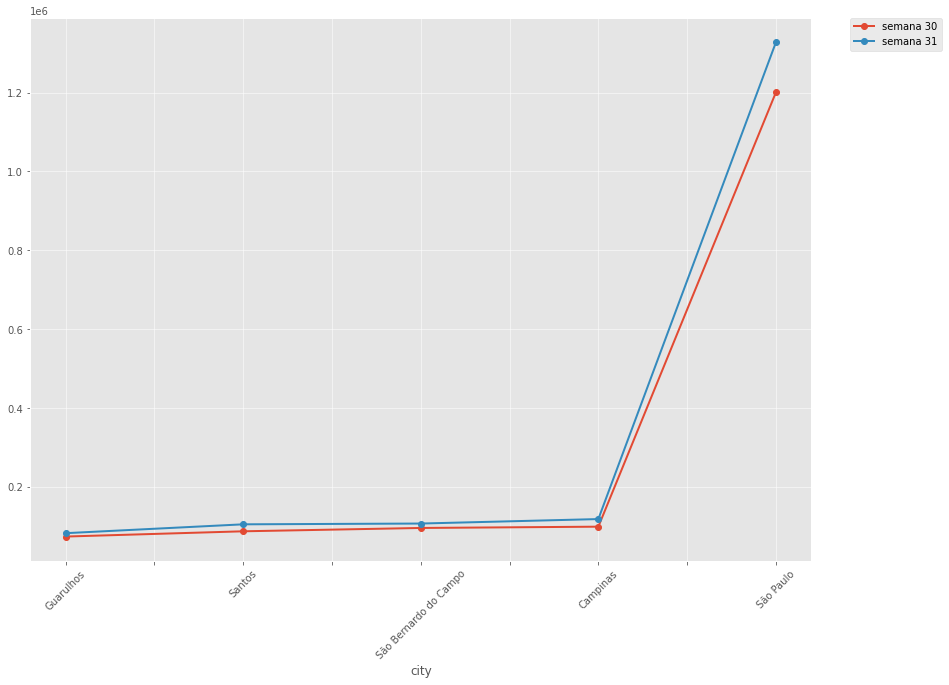

In [32]:
plt.style.use('ggplot')
df[(df['state']=='SP')&(df['epidemiological_week']==30)].groupby('city')['confirmed'].sum().sort_values().tail(5).plot(marker='o',label='semana 30')
df[(df['state']=='SP')&(df['epidemiological_week']==31)].groupby('city')['confirmed'].sum().sort_values().tail(5).plot(marker='o',label='semana 31')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

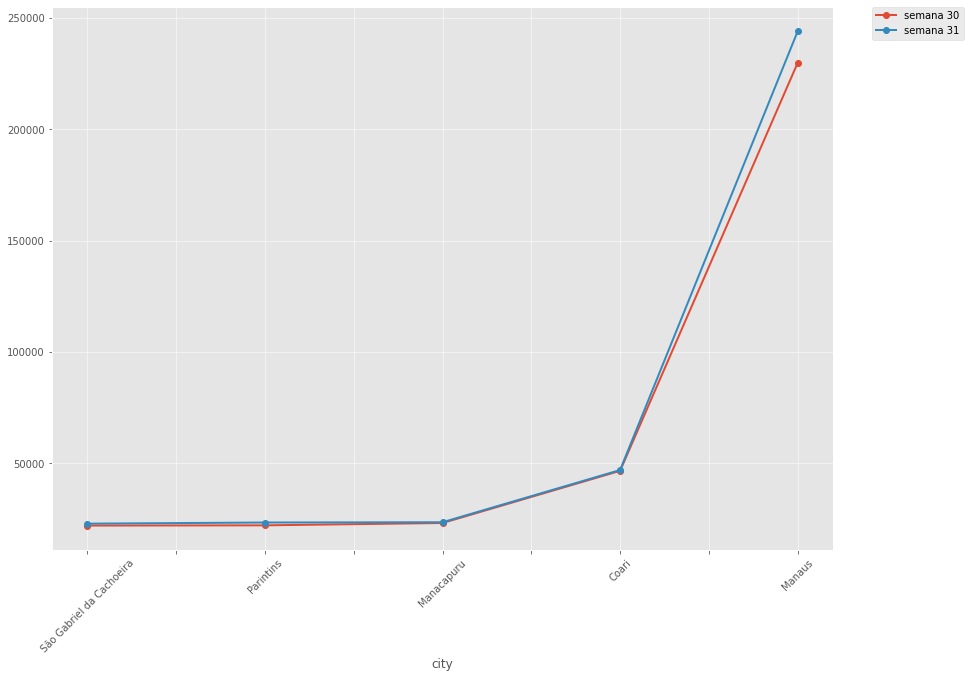

In [33]:
plt.style.use('ggplot')
df[(df['state']=='AM')&(df['epidemiological_week']==30)].groupby('city')['confirmed'].sum().sort_values().tail(5).plot(marker='o',label='semana 30')
df[(df['state']=='AM')&(df['epidemiological_week']==31)].groupby('city')['confirmed'].sum().sort_values().tail(5).plot(marker='o',label='semana 31')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

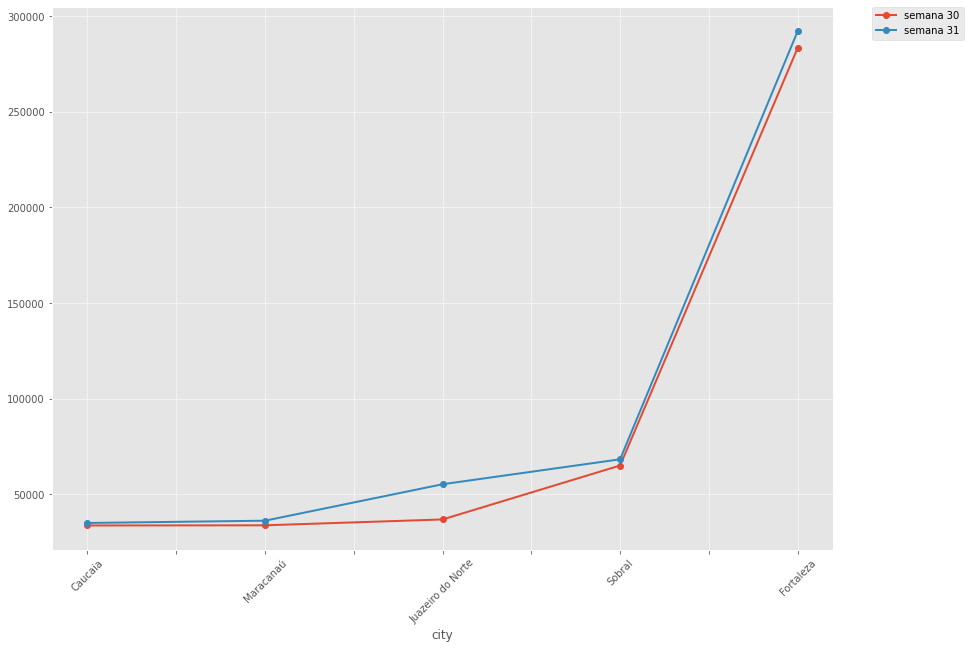

In [34]:
plt.style.use('ggplot')
df[(df['state']=='CE')&(df['epidemiological_week']==30)].groupby('city')['confirmed'].sum().sort_values().tail(5).plot(marker='o',label='semana 30')
df[(df['state']=='CE')&(df['epidemiological_week']==31)].groupby('city')['confirmed'].sum().sort_values().tail(5).plot(marker='o',label='semana 31')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=45)

In [35]:
#contando os valores ausentes/nulos do dataset filtrado
df.isnull().sum()

state                      0
city                    5728
date                       0
day                        0
is_last                    0
epidemiological_week       0
population              3544
confirmed                  0
death_rate                 0
deaths                     0
new_confirmed              0
new_deaths                 0
region                     0
dtype: int64

In [36]:
#quantidade de estados do Brasil no dataset
df['state'].nunique()

27

In [37]:
# #quantidade de cidades do Brasil no dataset
df['city'].nunique()

5294

### Aplicando filtro para não contabilizar os dados dos feriados que tiveram durante a pandemia

Text(0.5, 0, 'média de novos casos')

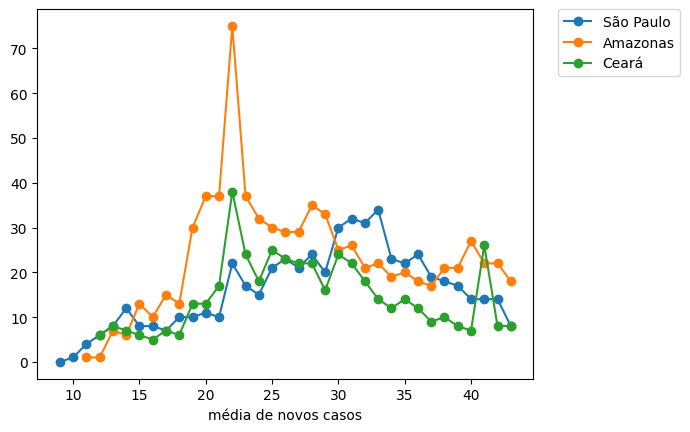

In [38]:
plt.style.use('default')
df[df['state'] == 'SP'].groupby('epidemiological_week')['new_confirmed'].mean().round().plot(marker='o',label='São Paulo')
df[df['state'] == 'AM'].groupby('epidemiological_week')['new_confirmed'].mean().round().plot(marker='o',label='Amazonas')
df[df['state'] == 'CE'].groupby('epidemiological_week')['new_confirmed'].mean().round().plot(marker='o',label='Ceará')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('média de novos casos')

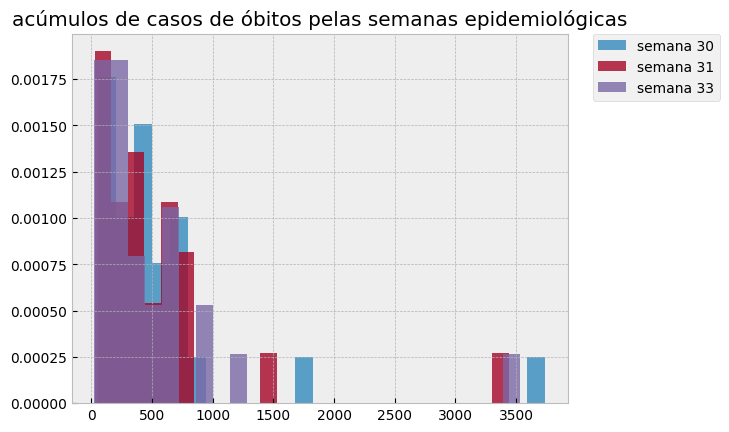

In [39]:
plt.style.use('bmh')
plt.subplots()
df[df['epidemiological_week'] == 30].groupby('state')['new_deaths'].sum().hist(histtype="stepfilled",bins=25, alpha=0.8, density=True, label='semana 30')
df[df['epidemiological_week'] == 31].groupby('state')['new_deaths'].sum().hist(histtype="stepfilled",bins=25, alpha=0.8, density=True, label='semana 31')
df[df['epidemiological_week'] == 33].groupby('state')['new_deaths'].sum().hist(histtype="stepfilled",bins=25, alpha=0.8, density=True, label='semana 33')
plt.title('acúmulos de casos de óbitos pelas semanas epidemiológicas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

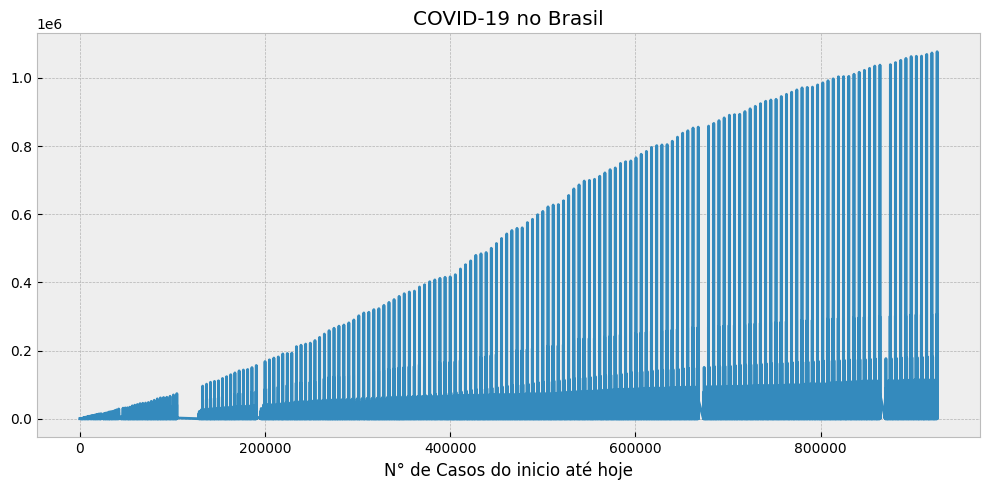

In [40]:

fig, ax = plt.subplots(figsize = (10,5))

ax.plot('confirmed', data = df)
ax.set_title('COVID-19 no Brasil')
ax.set_xlabel('N° de Casos do inicio até hoje')
plt.tight_layout()

### Top 5 estados brasileiros com mais casos até o dia 19-10-2020 (ultimo dia que o dataset pegou durante a analise)

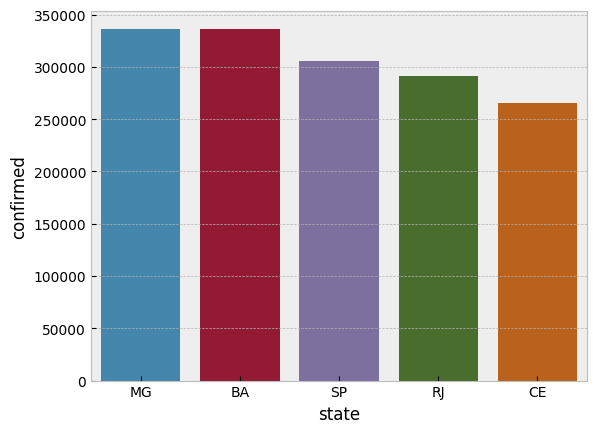

In [41]:
top5_confirmados_estados_br = df.loc[df.date == '2020-10-19', ['state', 'confirmed']] \
    .sort_values(by = 'confirmed', ascending = False)[1:6]


sns.barplot(x ='state', y ='confirmed', data=top5_confirmados_estados_br);


# top5_confirmados_estados_br

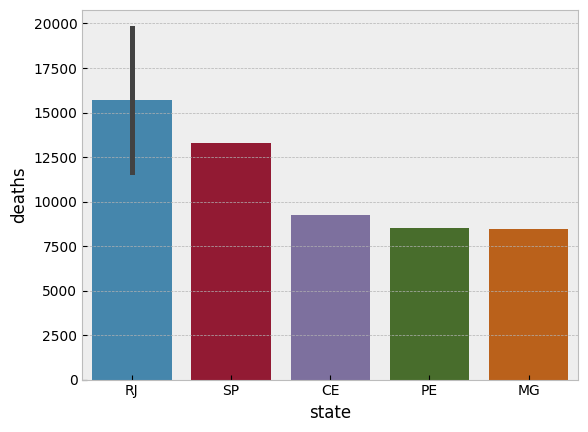

In [42]:
top5_mortes_estados_br = df.loc[df.date == '2020-10-19', ['state', 'deaths']] \
    .sort_values(by = 'deaths', ascending = False)[1:7]

sns.barplot(x = 'state', y = 'deaths', data = top5_mortes_estados_br);

In [43]:
df.groupby('state')['deaths'].count()

state
AC      3935
AL     16958
AM     11140
AP      3025
BA     65188
CE     32849
DF       635
ES     14403
GO     36265
MA     35906
MG    123812
MS     12139
MT     21518
PA     25209
PB     35007
PE     32249
PI     33636
PR     60821
RJ     17420
RN     27313
RO      8773
RR      3024
RS     72468
SC     47538
SE     12584
SP    106095
TO     21587
Name: deaths, dtype: int64

In [44]:
#filtrando os dados da cidade de São Paulo
df_sp = df[df['state']=='SP']
df_sp = df_sp.sort_values(by=['date'], ascending=False)

df_sp

,state,city,date,day,is_last,epidemiological_week,population,confirmed,death_rate,deaths,new_confirmed,new_deaths,region
925919,SP,NaN,2020-10-22,241,True,43,45919049.0,1076939,0.0357,38482,3678,111,Sudeste
925311,SP,Guariba,2020-10-22,177,False,43,40105.0,1178,0.0280,33,0,0,Sudeste
925329,SP,Ibiúna,2020-10-22,199,False,43,78878.0,441,0.0590,26,0,0,Sudeste
925328,SP,Ibitinga,2020-10-22,176,False,43,60033.0,1573,0.0267,42,0,0,Sudeste
925327,SP,Ibirá,2020-10-22,195,False,43,12393.0,388,0.0232,9,0,0,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,SP,NaN,2020-02-27,3,False,9,45919049.0,1,0.0000,0,0,0,Sudeste
2,SP,São Paulo,2020-02-26,2,False,9,12252023.0,1,0.0000,0,0,0,Sudeste
3,SP,NaN,2020-02-26,2,False,9,45919049.0,1,0.0000,0,0,0,Sudeste
1,SP,NaN,2020-02-25,1,False,9,45919049.0,1,0.0000,0,1,0,Sudeste


In [45]:
#filtrando os dados apenas da cidade de Campinas - SP
df_ma = df[df['state']=='AM']
df_ma = df_ma.sort_values(by=['date'], ascending=False)

df_ma

,state,city,date,day,is_last,epidemiological_week,population,confirmed,death_rate,deaths,new_confirmed,new_deaths,region
925896,AM,NaN,2020-10-22,224,True,43,4144597.0,155230,0.0283,4396,765,25,Norte
920466,AM,Japurá,2020-10-22,165,False,43,2755.0,456,0.0022,1,0,0,Norte
920464,AM,Itamarati,2020-10-22,163,False,43,7851.0,581,0.0103,6,0,0,Norte
920463,AM,Itacoatiara,2020-10-22,208,False,43,101337.0,2338,0.0317,74,0,0,Norte
920462,AM,Iranduba,2020-10-22,201,False,43,48296.0,2147,0.0275,59,0,0,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,AM,NaN,2020-03-15,3,False,12,4144597.0,2,0.0000,0,0,0,Norte
182,AM,Manaus,2020-03-14,2,False,11,2182763.0,2,0.0000,0,0,0,Norte
213,AM,NaN,2020-03-14,2,False,11,4144597.0,2,0.0000,0,0,0,Norte
167,AM,NaN,2020-03-13,1,False,11,4144597.0,2,0.0000,0,2,0,Norte


Aplicando um filtro para visualizar os dados que indiquem numeros positivos.
Foi visto que há valores negativos no dataset, ex: -1

In [46]:
df_sp = df_sp[(df_sp['new_deaths'] >= 0) & (df_sp['new_confirmed'] >= 0) & (df_sp['deaths'] >= 0) & (df_sp['confirmed'] >= 0)] 
df_sp
# df_sp.sample(5)

,state,city,date,day,is_last,epidemiological_week,population,confirmed,death_rate,deaths,new_confirmed,new_deaths,region
925919,SP,NaN,2020-10-22,241,True,43,45919049.0,1076939,0.0357,38482,3678,111,Sudeste
925311,SP,Guariba,2020-10-22,177,False,43,40105.0,1178,0.0280,33,0,0,Sudeste
925329,SP,Ibiúna,2020-10-22,199,False,43,78878.0,441,0.0590,26,0,0,Sudeste
925328,SP,Ibitinga,2020-10-22,176,False,43,60033.0,1573,0.0267,42,0,0,Sudeste
925327,SP,Ibirá,2020-10-22,195,False,43,12393.0,388,0.0232,9,0,0,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,SP,NaN,2020-02-27,3,False,9,45919049.0,1,0.0000,0,0,0,Sudeste
2,SP,São Paulo,2020-02-26,2,False,9,12252023.0,1,0.0000,0,0,0,Sudeste
3,SP,NaN,2020-02-26,2,False,9,45919049.0,1,0.0000,0,0,0,Sudeste
1,SP,NaN,2020-02-25,1,False,9,45919049.0,1,0.0000,0,1,0,Sudeste


In [47]:
#filtrando os dados apenas do estado do Céara - CE
df_ce = df[df['state']=='CE']
df_ce = df_ce.sort_values(by=['date'], ascending=False)

df_ce

,state,city,date,day,is_last,epidemiological_week,population,confirmed,death_rate,deaths,new_confirmed,new_deaths,region
925899,CE,NaN,2020-10-22,221,True,43,9132078.0,268345,0.0344,9243,624,0,Nordeste
920989,CE,Fortaleza,2020-10-22,221,False,43,2669342.0,54170,0.0719,3895,0,0,Nordeste
920998,CE,Guaraciaba do Norte,2020-10-22,200,False,43,40642.0,811,0.0185,15,0,0,Nordeste
920997,CE,Guaiúba,2020-10-22,189,False,43,26064.0,310,0.0871,27,0,0,Nordeste
920996,CE,Groaíras,2020-10-22,188,False,43,11068.0,798,0.0175,14,0,0,Nordeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,CE,Fortaleza,2020-03-17,2,False,12,2669342.0,9,0.0000,0,1,0,Nordeste
344,CE,Aquiraz,2020-03-17,2,False,12,80271.0,1,0.0000,0,0,0,Nordeste
322,CE,NaN,2020-03-16,1,False,12,9132078.0,9,0.0000,0,9,0,Nordeste
284,CE,Fortaleza,2020-03-16,1,False,12,2669342.0,8,0.0000,0,8,0,Nordeste


In [48]:
# mask = ((df_fortaleza['data'] >= '2020-05-22') & (df_fortaleza['data'] <= '2020-05-27'))
# df_fortaleza = df_fortaleza.drop(mask.index)

# df_fortaleza

In [49]:
# df_fortaleza.drop(df_fortaleza[(df_fortaleza.data >= '2020-05-22') & (df_fortaleza['data'] <= '2020-05-27')].index, inplace=True)
# filtro_feriados = df_fortaleza[(df_fortaleza.data >= '2020-05-22') & (df_fortaleza.data <= '2020-05-27')]
# filtro_feriados

In [50]:
df.dropna(subset=['state'], inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df_deaths_race = df.loc[(df.deaths > 0)]
df_deaths_race

,state,city,date,day,is_last,epidemiological_week,population,confirmed,death_rate,deaths,new_confirmed,new_deaths,region
389,SP,São Paulo,2020-03-17,22,False,12,12252023.0,156,0.0064,1,11,1,Sudeste
408,SP,NaN,2020-03-17,22,False,12,45919049.0,164,0.0061,1,12,1,Sudeste
480,SP,São Paulo,2020-03-18,23,False,12,12252023.0,214,0.0140,3,58,2,Sudeste
501,SP,NaN,2020-03-18,23,False,12,45919049.0,240,0.0125,3,76,2,Sudeste
553,RJ,Miguel Pereira,2020-03-19,1,False,12,25538.0,1,1.0000,1,1,1,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...
925916,RS,NaN,2020-10-22,227,True,43,11377239.0,228762,0.0241,5518,1299,36,Sul
925917,SC,NaN,2020-10-22,225,True,43,7164788.0,241044,0.0125,3011,2211,13,Sul
925918,SE,NaN,2020-10-22,223,True,43,2298696.0,83139,0.0259,2157,313,6,Nordeste
925919,SP,NaN,2020-10-22,241,True,43,45919049.0,1076939,0.0357,38482,3678,111,Sudeste


In [52]:
df_cases_race = df.loc[(df.confirmed > 0)]
df_cases_race

,state,city,date,day,is_last,epidemiological_week,population,confirmed,death_rate,deaths,new_confirmed,new_deaths,region
0,SP,São Paulo,2020-02-25,1,False,9,12252023.0,1,0.0000,0,1,0,Sudeste
1,SP,NaN,2020-02-25,1,False,9,45919049.0,1,0.0000,0,1,0,Sudeste
2,SP,São Paulo,2020-02-26,2,False,9,12252023.0,1,0.0000,0,0,0,Sudeste
3,SP,NaN,2020-02-26,2,False,9,45919049.0,1,0.0000,0,0,0,Sudeste
4,SP,São Paulo,2020-02-27,3,False,9,12252023.0,1,0.0000,0,0,0,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...
925916,RS,NaN,2020-10-22,227,True,43,11377239.0,228762,0.0241,5518,1299,36,Sul
925917,SC,NaN,2020-10-22,225,True,43,7164788.0,241044,0.0125,3011,2211,13,Sul
925918,SE,NaN,2020-10-22,223,True,43,2298696.0,83139,0.0259,2157,313,6,Nordeste
925919,SP,NaN,2020-10-22,241,True,43,45919049.0,1076939,0.0357,38482,3678,111,Sudeste


In [53]:
df_deaths_race = pd.DataFrame(df_deaths_race.groupby(['state', 'date']).sum()['deaths']).unstack().T.droplevel(level=0)
df_deaths_race

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2020-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
2020-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN
2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-18,1358.0,4354.0,8664.0,1462.0,14632.0,18420.0,7090.0,7205.0,10748.0,7768.0,16892.0,2994.0,5921.0,13364.0,5970.0,16974.0,4590.0,9659.0,39530.0,4944.0,2842.0,1347.0,10694.0,5934.0,4268.0,76040.0,2050.0
2020-10-19,1358.0,4364.0,8682.0,1468.0,14684.0,18434.0,7122.0,7220.0,10864.0,7777.0,16906.0,3024.0,5936.0,13372.0,6002.0,16980.0,4608.0,9673.0,39540.0,4945.0,2854.0,1352.0,10776.0,5952.0,4278.0,76055.0,2057.0
2020-10-20,1361.0,4369.0,8726.0,1468.0,14726.0,18454.0,7150.0,7232.0,10932.0,7787.0,16966.0,3030.0,5948.0,13376.0,6020.0,17010.0,4628.0,9735.0,39606.0,4948.0,2856.0,1355.0,10904.0,5982.0,4284.0,76492.0,2065.0
